<div align ="right">Thomas Jefferson University <b>COMP 103</b>: Intro to Visualization</div>

# Heatmaps

## 2D Histograms

The simplest heatmap type visualization that we will look at is a 2D histogram. The built-in pyplot function for creating one of these is called `.hist2d`. You can read the <a href = 'https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist2d.html'>hist2d function definition</a> here. 

As you might expect, a major difference in creating one of these plots is that it requires two data arrays as arguments instead of one -- as we will be plotting where data falls in two dimensions simultaneously. This will let us introduce a few elements that we will need for subsequent visualizations. For this data rather than reading in data from the outside we will use `numpy` (remember that?) to create some fake data to plot. This is described in the comments to the code below.

In a regular histogram, matplotlib would calculate the heights of the bars from the number of individuals in each category. In this case, instead of bar heights, we will get different colors for different numbers of observations. 

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# We create two arrays of random numbers, drawn from normal distributions,
## specifying mean, SD, and number of observations

x = np.random.normal(0,2,50000)             # mean = 0, SD = 2, 10000 observations
y = (x*2 + np.random.normal(0,4,50000))     # underlying line eq, y=2x, different SD

fig = plt.figure( figsize = (12,4))

ax1 = plt.subplot(1,2,1)
plt.hist2d(x, y, bins=50)    # This codes for the histogram
plt.colorbar()                # This plots the colorbar - a 'legend' for what the colors mean

ax2 = plt.subplot(1,2,2)
plt.hist2d(x, y, bins=50, cmap = plt.cm.Greens)    # Same histogram, only cmap changed
plt.colorbar()                                      # Note that this automatically detects
                                                    ## the colormap being used
plt.show()

<Figure size 1200x400 with 4 Axes>

The number of bins is a very important parameter to decide on for a visualization like this. 

In the second example, we specified a term called `cmap`. This is a particular colormap, which is basically a set of colors in which the intensities vary across a range of values. Various colormaps are included within matplot lib and they can be called by their names. Go take a look at <a href ='https://matplotlib.org/examples/color/colormaps_reference.html'>this reference document of the matplotlib colormaps</a>. Note that the first colormap is titled `viridis`, and these colors match what we see in the plot on the left. This is the default colormap used if we don't specify a different one. 

There are a number of different categories of colormap. Both 'sequential' and 'perceptually uniform sequential' are used to achieve a gradient that is natural to the eye. I think the standard sequential sets based on indivudal colors work particularly well for 2D histograms, where low to high intensity is what is being plotted. Another form is the 'diverging'colormap, where middle values are low intensity and divergences from those values get more intense in contrasting directions. 'Qualitative' colormaps are a set of discrete colors rather than a gradient. They are good for coding categorical data as we will see below. 

Using the graphs above play with some different color maps and decide what categories work best for these histograms. There are some others in the 'misc' category. They can actually lead to some problems of intrepretation so be careful with these. Try them as well.

The `plt.colorbar()` function is another important element in constructing these graphs. If you comment it out of the code above you'll see that the graph doesn't change, but our color legend goes away. Another thing that you should notice is that it automatically picks up the relevant cmap from the associated plot - you don't have to specify the color map. 

Another mode of this kind of graph is the `hexbin` graph. These are useful in particular when your x and y coordinates represent physical space. You will see hexagons a lot on board games, for example, as they have some good properties for modeling movement across 2D space compared to squares. We call these very similarly to the 2D histogram with a parameter called `gridsize` in place of bins.

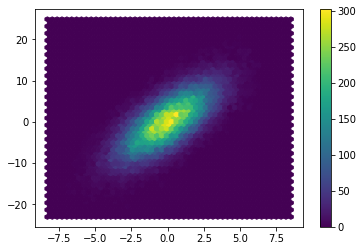

In [3]:
plt.hexbin(x, y, gridsize = 50)    # note that we specify 'gridsize'  in place of 'bins'
plt.colorbar()    
plt.show()

**Questions to answer:** Why is it important to our visualization efforts that colormaps be included within matplotlib. What would we have to do otherwise? Try comparing sequence to diverging to the top three options . Which do you think is better and why? Partic good situatios for diverging?

- matplotlib allows for us to create the axis and scale the graph while providing colors
- sequence is monochromatic, with varying colors only in saturation, diverging uses two different colors to represent a positive and negative extreme with white being the median, 
- Diverging is good in situations that have extremes. For example a bell curve would be good with diverging. 

What number of bins did you decide was best for the 2D histogram? Why?

- I think 50 worked nicely because the data was continuous flowing nicely, but it was not too chaotic that it was difficult to understand
- Shows continuity but doesnt look like raw data

## Contour plots


Another type of 2D plot is a contour plot. The most familar type of contour plot is a topographic map. Contour lines represent all points of a particular value. such that all datapoints on one side of the contour represent values higher than the limit and all values to the other side of the contour are lower than the limit. 

The function for creating a contour plot is `contour()`. Contour requires us to give data in the form X, Y, Z where X and Y represent a set of coordinates and Z represents the value at each coordinate. Contour lines don't have to be plotted at the x-y combination of every pixel on the graph, of course. When we feed an array into contour matplotlib automatically smooths the contour lines to make them continuous (much like with the density plot of a histogram). 

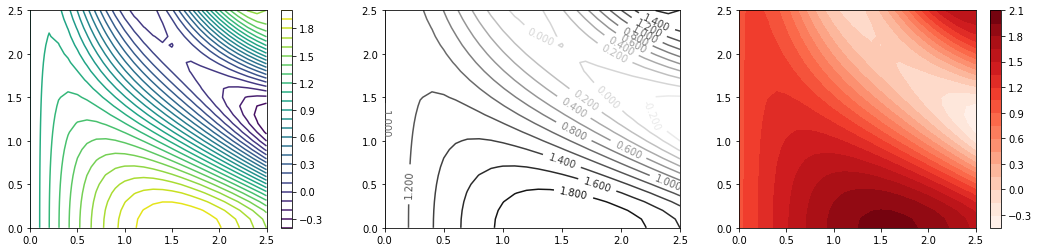

In [4]:
# In this part we are using numpy to generate an array of data for plotting

def f(x,y):
    return np.sin(x) + np.cos(x*y)

x = np.linspace(0,2.5,26)               # x = [0, 0.1, 0.2, 0.3 ... 2.5]    see below for explanation
y = np.linspace(0,2.5,26)               
X,Y = np.meshgrid(x,y)                  # combines x and y into a 2D array of x and y values, 
Z = f(X,Y)                              # creates a 2D array Z that is the value of Z at each point X,Y
                                        ## this is a shortcut method to setting up an array of Z values
                                        ## without using for loops. There are lots of ways to achieve this.

## Here is where we start with the contour plot 

fig = plt.figure( figsize = (18,4))                       # set up a wide figure space to fit in 3 plots

ax1 = plt.subplot(1,3,1)
plt.contour(X,Y,Z,25, cmap = plt.cm.viridis)
plt.colorbar()

ax2 = plt.subplot(1,3,2)
CS = plt.contour(X,Y,Z,12, cmap = plt.cm.binary)
plt.clabel(CS, inline=True, fontsize=10)                  # plt.clabel() function replaces plt.colorbar()

ax3 = plt.subplot(1,3,3)
plt.contourf(X,Y,Z,20, cmap = plt.cm.Reds)                # note the function 'countourf' 
plt.colorbar()

plt.show()

**Questions to answer:** What does the number after the X,Y,Z coordinates in the contour function specify? Try changing that value, what do you think is an ideal value for this plot? What happens if you try to use `x` and `y` instead of `X` and `Y` when plotting?

- The number has something to do with how many lines there are. the graph on the left looks solid colored at some points and the # is set to 100.
- I think 25 is a nice number because it shows where the numbers are densely packed and where the trends are without being too much.
- 

Why didn't I include the colorbar on the second plot? What does CS represent? Why did we have to do this? Can you figure out how to make the text on the contours black rather than varying with the contour line? What happens if you adjust the number after `X,Y,Z,` on this one? What is an ideal value for it?

- A color bar was not included since it has labels.
- CS stands for contour size. representing how far it is (?)
- I can get it kinda black but it fades
- I don't think that having too many is good on this graph since it has labels. I think 10 is a good number with 15 being too much

What does function `contourf()` do? Why do you think I changed the `cmap` for that plot? Do you agree with the change?

- contourf() fills intervals at the top
- to make it red and fill the intervals to be nicer than a random coloration
- 

## Simple Heatmaps

A heat map is a grid that shows data values for different categories. It's different from a contour plot in that it is generally used to show variation in a continuous variable across a grid of categorical x and y values (rather than continuous x and y variables). In this way it is kind of like a 3D bar plot, with color used to supply the variable dimension in place of bar height. 

Below is an example heatmap. We can use the `pcolormesh()` function to create a simple heat map from a dataframe. We need to pass pcolormesh an array of data, so one thing we have to do is make sure that our dataframe consists only of the numbers we want to use, if there is a row descriptor in our dataframe, we need to remove it so that all the values in the dataframe are numbers.

The example below is for a set of relative food prices, compared to a national average, as observed at competing grocery stores in the philadelphia area (again, this data is completely made up). The row descriptor is therefore 'Store'. We pull these strings out of the data using the `set_index` command, leaving just the numbers in the grid. As you can see once you run the code below, graphic is very simple and much easier to intrepret than the table below.



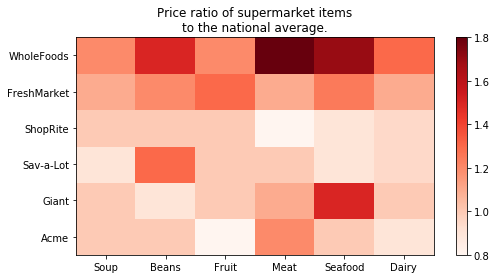


              Soup  Beans  Fruit  Meat  Seafood  Dairy
Store                                                
Acme          1.0    1.0    0.8   1.2     1.00   0.90
Giant         1.0    0.9    1.0   1.1     1.50   1.00
Sav-a-Lot     0.9    1.3    1.0   1.0     0.90   0.95
ShopRite      1.0    1.0    1.0   0.8     0.90   0.95
FreshMarket   1.1    1.2    1.3   1.1     1.25   1.10
WholeFoods    1.2    1.5    1.2   1.8     1.70   1.30


In [5]:
food = pd.read_csv('data/food_price.csv')
type(food)
food = food.set_index('Store')

fig = plt.figure( figsize = (8,4))
ax = plt.subplot()

plt.pcolormesh(food, cmap = 'Reds')

plt.yticks(np.linspace(0.5, len(food.index)-0.5, len(food.index)), food.index)
plt.xticks(np.linspace(0.5, len(food.columns)-0.5, len(food.columns)), food.columns)

plt.title('Price ratio of supermarket items\nto the national average.')

plt.colorbar()

plt.show()

print('\n',food)




One note about this method is that you may notice that the y axis is 'flipped'. That's because by default matplotlib is plotting to a y axis in which low values are on the bottom and high values are on top (just like every y axis you've ever looked at). So the first item in the dataframe is assigned the lowest number, and so on. 


To add the annotations we used the function `numpy.linspace`. We used it in the last exercise as well. This incredibly useful function takes 3 arguments, a starting point, an ending point, and the number of values that should be generated: 


In [6]:
print('count from 1 to 10 with ten increments:')
print(np.linspace(1,10,10),'\n')

print('count from 0 to 2 by thirds (7 increments to get beginning and end points):')
print(np.linspace(0,2,7),'\n')

print('count from 0 to 2 by thirds (leave off last value for more intuitive usage):')
print(np.linspace(0,2,6, endpoint=False),'\n')

print('this is the increment we used above to get values centered on each of six squares:')
print(np.linspace(0.5,5.5,6),'\n')

print('SAME RESULT but using the length of a dataframe element so we don\'t have to count manually:')
print(np.linspace(0.5, len(food.columns)-0.5, len(food.columns)),'\n')

count from 1 to 10 with ten increments:
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.] 

count from 0 to 2 by thirds (7 increments to get beginning and end points):
[0.         0.33333333 0.66666667 1.         1.33333333 1.66666667
 2.        ] 

count from 0 to 2 by thirds (leave off last value for more intuitive usage):
[0.         0.33333333 0.66666667 1.         1.33333333 1.66666667] 

this is the increment we used above to get values centered on each of six squares:
[0.5 1.5 2.5 3.5 4.5 5.5] 

SAME RESULT but using the length of a dataframe element so we don't have to count manually:
[0.5 1.5 2.5 3.5 4.5 5.5] 




## Annotated Heatmaps

Another thing we could do with a heatmap would be to annotate it, so that the actual values show up on the squares. We are actually going to use this as a jumping off point to think about new, easier ways to do things. First let's go through and do it by hand using the same dataframe. The `DataFrame.iloc()` method allows us to call values from inside a data frame just as we would call values from a numpy array, so using coordinates within the dataframe.

The classic way to walk through a data matrix is to use nested `for` loops. You can see this structure below. The outer for loop in this case represents the 

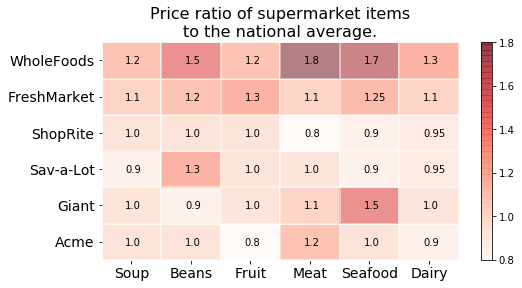

In [23]:
fig = plt.figure( figsize = (8,4))
ax = plt.subplot()

plt.pcolormesh(food, cmap = 'Reds',  edgecolor = 'white',alpha = 0.5)

for i in range(len(food.index)):
    for j in range(len(food.columns)):
        plt.text(j+0.4,i+0.4,food.iloc[i,j])    # note  the use of two different coordinate systems
                                                ## X,Y which corresponds to column, row (j,i) for position of text on graph
                                                ## index, column to pull the data from the datafrave (i,j)
                                                ## this is super confusing and easy to mess up
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')

plt.yticks(np.linspace(0.5, len(food.index)-0.5, len(food.index)), food.index, size =14)
plt.xticks(np.linspace(0.5, len(food.columns)-0.5, len(food.columns)), food.columns, size =14)

plt.title('Price ratio of supermarket items\nto the national average.', size =16)

plt.colorbar()

plt.show()


This ends up being a much prettier, much more functional colormap, but it took a bit of doing to get there. Take a look at the code above and see if you can answer the following questions about it:

**Questions to answer:** Why did we have to set the value of alpha to 0.5? What happens without that code? What did `edgecolor` do? How did our use of np.linspace in the examples above work to get the x and y labels in the proper position?

- The color was changed. without the alpha= 0.5 it is lighter in color
- The edge color was for inbetween the boxes. It makes it more separated and shows defined edges
- I moved the linspace to show that the x-axis needs the .5 to go in the middle of the boxes

Why do you think it is better to use `len(food.index)` than to just plug in the number `6` in the code?

- This allows for it to be changeable. If the index changes then the graph will also

Can you explain this line of code ```plt.text(j+0.4,i+0.4,food.iloc[i,j])```?

- This code labels the graph. The .4 that is added will make it centered in the graph boxes

### The Easy Way (seaborn cheatcode)

Because (as you probably found out last week with the box plots - it can take a bit of doing to do things in base matplotlib. For example when we wanted to extract categories from a boxplot we had to go through a whole rigamarole of creating a new data structure. 

There is a library called `seaborn` that uses matplotlib but has a number of pre-programmed functions within it. It's very likely that when trying to google answers for your previous assignements (histograms, boxplots, etc.) you've already stumbled across this. These are really useful things, and going forward, you shouldn't be afraid to use those things to create attractive solutions. If you need full customization potential you may want to stick with matplotlib, but if you want to make a functional graphic quickly there are a lot of use case things that are built into seaborn functions. See how easy it is to add annotations to our heatmap using seaborn? Some of the other formatting aspects work a little differently, so there is a learning curve to each solution. For example, seaborn creates the colorbar and `ylabel` by default. It also maintains the structure of our dataframe instead of inverting it, which is nice. Some of our typical adjustments will work the same way, but some will be different.

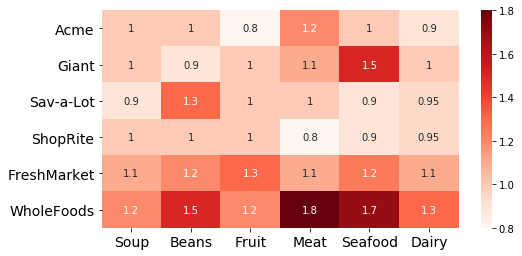

In [8]:
import seaborn as sns

fig = plt.figure( figsize = (8,4))
ax = sns.heatmap(food, annot = True, cmap = 'Reds')

plt.xticks(size=14)
plt.yticks(size = 14)
plt.ylabel('')

plt.show()


## Assignment 

I have attached a microarray dataset `Qi_NormalizedDataTibet_cellulose_fungi.csv` published by the <a href = 'https://www.ou.edu/ieg/publications/datasets'>Institute for Environmental Genomics</a> at the University of Oklahoma. In this data, we see gene expression data from an environmental sample in two conditions - a control treatment and a treatment in which the soil was heated up. There were thousands of genes in this sample, I've cut it down to a more manageable number by selecting only those genes that were identified as belonging to basidiomycete fungi, involved in the degradation of cellulose. You can see <a href='http://129.15.40.254/NewIEGWebsiteFiles/publications/SupplData/Qi-NormalizedDataTibet.csv'>the full dataset here</a>.

For this assignment I'd like you to generate a heatmap of this data. There are four genes that were discovered, each of which occurs several times in the sample but in different organisms. I'd like to see you highlight somehow the labelling so that we can easily see which of the four genes each sample belongs to without having to squint at the y axis. Make sure the boxes are annotated. You will not be able to just pull this dataframe in and run with it, you may have to create a new dataframe from your starting dataframe. I would suggest using base matplotlib to do this rather than the seaborn graph, but if you want to dig in on the seaborn plot that's fine too, just be aware there will be some learning curve with figuring out how to do the adjustments that the figure will require. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

fungi = pd.read_csv('data/Qi_NormalizedDataTibet_cellulose_fungi.csv')
#print (fungi)

for i in range(len(fungi)):
    if i == 'axe':
        print ('control_a')
    elif i == 'collobiase':
        print ('control_a')
    elif i == 'endoglocanase':
        print ('control_a')
    elif i == 'exoglucanase':
        print ('control_a')
        
fig = plt.figure( figsize = (8,4))
ax = plt.subplot()

plt.pcolormesh(fungi, cmap = 'Reds',  edgecolor = 'white',alpha = 0.5)



TypeError: '<=' not supported between instances of 'int' and 'str'


![Alt text that will appear on mouseover](images/TJU_logo_dummy_image.png "TJU logo")
